# A Data-Driven Analysis of Sales, Profit and Customer Trends

Through this report I will explore and analyse various business metrics using data visualisation techniques. Through detailed analysis of a fictional superstore dataset, this project aims to uncover trends and patterns that influence sales, profitability and customer engagement. I will use Pythons data analysis libraries, Pandas and Matplotlib. I will use a structured approach to understand the superstore’s retail performance. 

This project focuses on five main analytical sections: sales and profit analysis, customer and segment analysis, time-series analysis, product and inventory analysis, and discount and pricing analysis. Each section is designed to address specific business questions that retailers commonly face, from identifying top-selling products and profitable customer segments to exploring the impact of discounts on profitability and analysing sales trends over time.

# Section 1

## Introduction to dataset and Exploratory Data Analysis

In this section I am looking into the dataset before I perform more formal analysis. I will first look at the underlying structure of the data, and a general sense of the data and its characteristics and see if I can see any relationships between any variables.I will also assess the data and clean it where necessary, removing data that is partially completed and adjust any data types that need adjusting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Global_Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [3]:
df.shape

(1000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [6]:
df.isnull().sum().sort_values(ascending=False).head()

Postal Code    806
Row ID           0
Order Date       0
Order ID         0
Ship Mode        0
dtype: int64

In [7]:
df = df.drop(['Postal Code'], axis=1)

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [9]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [10]:
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales}')

Total Sales: $1710971.47


In [11]:
total_profit = round(df['Profit'].sum(),2)
print(f'Total Profit: ${total_profit}')

Total Profit: $288920.44


In [12]:
total_discount = df['Discount'].sum()
print(f'Total Discount: ${total_discount}')

Total Discount: $92.84


Exploring Categories and Subcategories with negative profit

In [13]:
negative_profit = df[df['Profit']<0]
neg_profit_by_cat_and_subcat = negative_profit.groupby('Category')[['Sub-Category']].value_counts().reset_index()
neg_profit_by_cat_and_subcat = neg_profit_by_cat_and_subcat.sort_values(by='count',ascending=False)
neg_profit_by_cat_and_subcat

,Category,Sub-Category,count
0,Furniture,Tables,32
8,Technology,Phones,25
1,Furniture,Chairs,22
4,Office Supplies,Appliances,20
5,Office Supplies,Storage,18
6,Office Supplies,Binders,13
10,Technology,Machines,12
9,Technology,Copiers,12
2,Furniture,Bookcases,11
11,Technology,Accessories,5


In [14]:
category_and_subcategory = df.groupby('Category')[['Sub-Category']].value_counts().reset_index()
category_and_subcategory= category_and_subcategory.sort_values(by='count',ascending=False)
category_and_subcategory

,Category,Sub-Category,count
13,Technology,Phones,179
0,Furniture,Bookcases,130
14,Technology,Copiers,126
4,Office Supplies,Appliances,125
1,Furniture,Chairs,95
2,Furniture,Tables,87
15,Technology,Machines,52
5,Office Supplies,Storage,45
6,Office Supplies,Binders,38
16,Technology,Accessories,38


# Section 2

## Sales and Profit Analysis

In this section I am exploring the fundamental aspects of a retail business by examining the relationships between sales, profit, and discounts across various product categories. These relationships are important to identify which products drive revenue, contribute to profitability and the effect of discounts.

By visualising these metrics we can uncover anomalies and areas for improvement. By looking at different product categories we can see which categories contribute most and which categories may require strategic adjustment.


#### Relationship between Sales and Profit

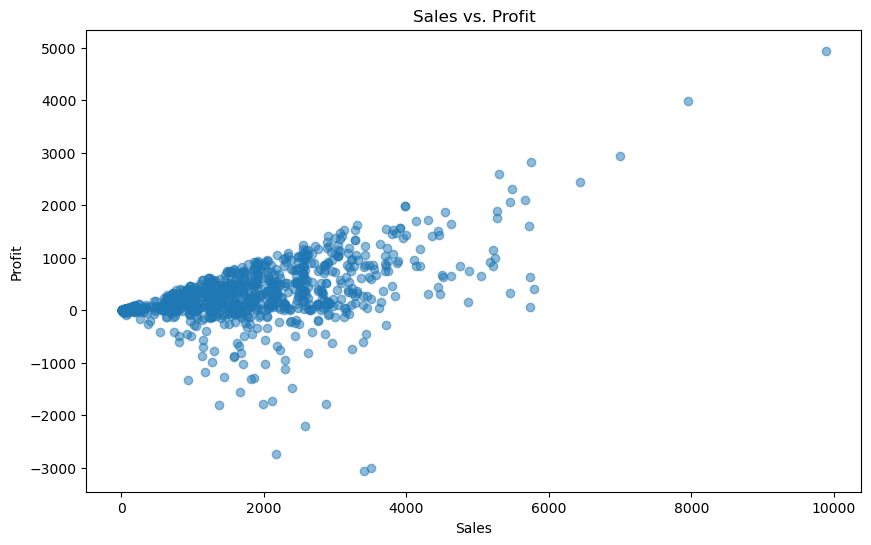

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Sales'], df['Profit'], alpha=0.5)
ax.set_title('Sales vs. Profit')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

In [16]:
correlation = round(df['Sales'].corr(df['Profit']),2)
print(correlation)

0.53


The correlation number tells us there is a moderate positive correlation between sales and profit, ehich means as one increases the other tends to increase as well. This number of 0.53 is strong enough to be considered as practically significant and to confirm there is a relationship between the two variables. Therefore we can say there is a relationship and that in general, the higher sales means higher profit. However, there are several high sales with low or negative profit, indicating low profit margins or heavily discounted items. This needs to be analysed further to see what is causing low profit on high selling items and to adjust pricing strategy appropriately.

### Sales Distribution by Category

In [17]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,601492.31
1,Office Supplies,352496.14
2,Technology,756983.02


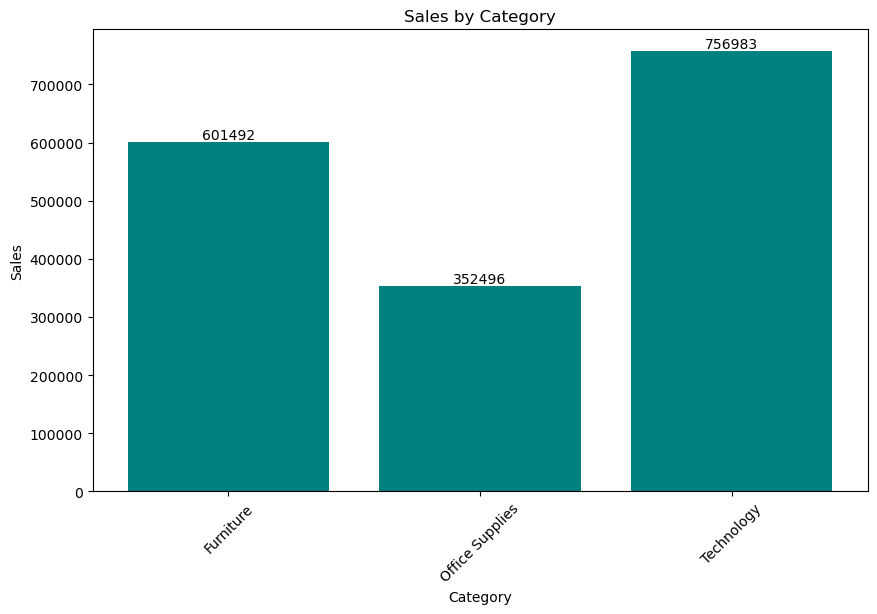

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sales_by_category['Category'], sales_by_category['Sales'],color='teal')
ax.set_title('Sales by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

This shows that Technology is the top-performing category in terms of sales revenue. This could be due to high demands in this category or higher-priced items. The least-performing category in terms of sales revenue is Office supplies, which is quite significantly lower than the other two categories.
These insights could guide decisions on marketing efforts and promotional strategies on lower performing categories. 

#### Profit Margin Analysis by sub category

In [19]:
df['Profit Margin']=df['Profit']/df['Sales']

In [20]:
sub_category_profit_margin = df.groupby('Sub-Category')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin',ascending=False)

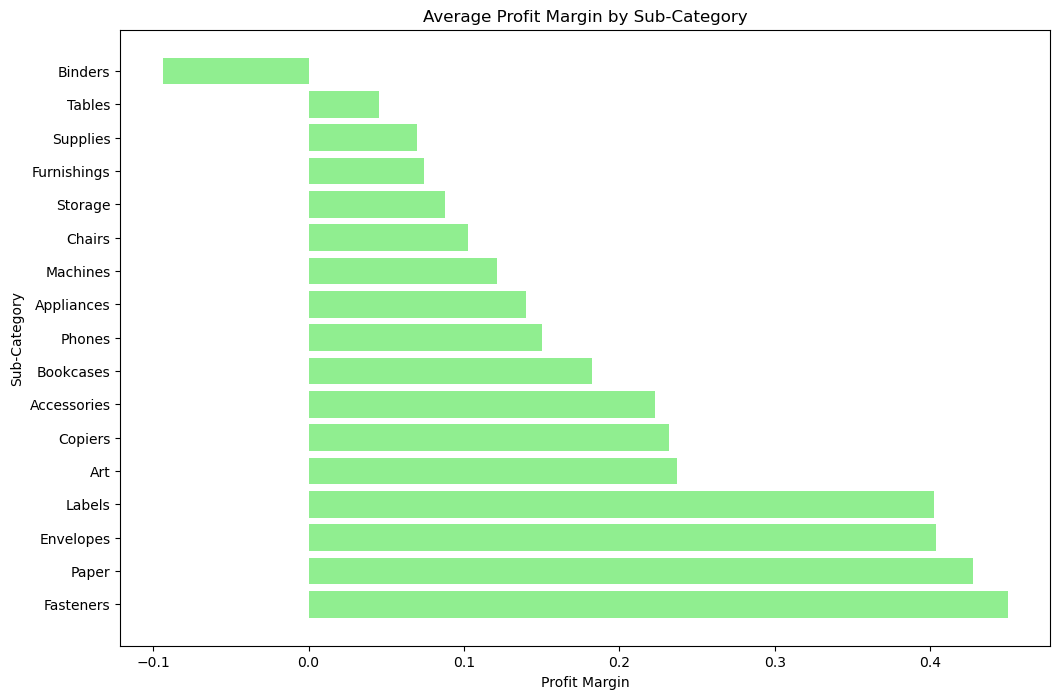

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(sub_category_profit_margin['Sub-Category'],sub_category_profit_margin['Profit Margin'],color='lightgreen')
ax.set_title('Average Profit Margin by Sub-Category')
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Sub-Category')
plt.show()

The bar plot highlights the average profit margins across various product sub-categories, sorted in descending order. From this we can gain some insights:

Labels, Envelopes, Paper and Fasteners are the top-performing sub-categories with profit margins around 40%. These high margins suggest that these sub-categories contribute significantly to overall profitability and could be areas where the business should focus on maintaining or expanding its offerings.

The sub-category Binders shows a negative profit margin of around -10%. This indicates that Binders might be generating losses, possibly due to high costs, heavy discounting, or low pricing. Binders may require a review of pricing strategies or cost management.

Tables, Suppliesm Furnishings, Storage and Chairs have low profit margins suggests that while they might be selling in volume, they are not contributing substantially to profit. Strategic decisions around these sub-categories might involve cost reduction, efficiency improvements, or targeted marketing to boost profitability.

In summary, the plot provides a clear view of which sub-categories are driving profits and which are detracting from the overall profitability, offering valuable insights for optimizing the product portfolio and pricing strategies.


### Impact of Discount on Sales

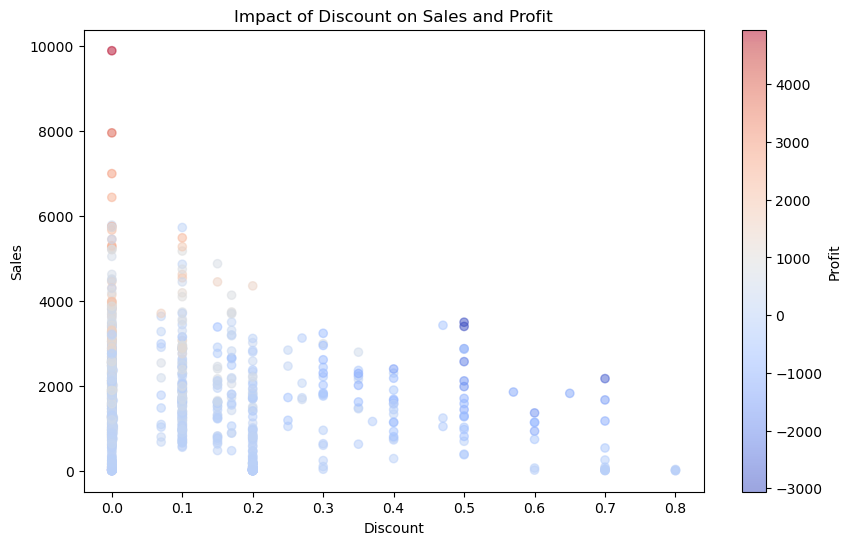

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(df['Discount'],df['Sales'], c=df['Profit'], cmap='coolwarm', alpha=0.5)
ax.set_title('Impact of Discount on Sales and Profit')
ax.set_xlabel('Discount')
ax.set_ylabel('Sales')
cbar = fig.colorbar(sc)
cbar.set_label('Profit')

Key insights from this:

Higher discounts are associated with lower profitability, with excessive discounting (over 50%) most likely harming the financial health of the business. Whilst the discounts generates sales, it appears it is not beneficial to profit. Looking more in depth, discounts between 0% ans 20% Show generally a good number of sales, with many of these orders showing positive profits (red to light blue colors). This suggests that lower discounts are more likely to contribute positively to the company's profitability. Any higher discount 30% or more, you see a decrease in the number of orders with the majority of orders shifting towards the blue spectrum indicating lower profits or even losses.

Outliers: There are a few high sales values at lower discount levels with strong profitability (dark red points). These outliers could be premium products or bulk orders where discounting is minimal, yet sales and profits remain high. On the other hand, there are also instances where even low-discount orders result in losses, likely due to high product costs or inefficiencies.

General Trend: The plot suggests that while discounting can drive sales to an extent, there is a tipping point beyond which the discounts erode profit margins significantly. This emphasizes the need for a carefully balanced discount strategy, aiming to offer enough incentive to drive sales without undermining profitability.

# Section 3

## Customer and Segment Analysis

Deeper analysis into understnading customers and how different segments contribute to the overall business. By looking at top customers, how different customer segments perform and where to focus efforts to boost engagement and profitability. By exploring these we will gain valuable insights into how different customer groups impact the business and they can help guide strategic decisions on customer engagement, marketing strategies, and long-term revenue growth.

### Top 10 Customers by Sales

In [23]:
top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_customers = top_customers.sort_values(by='Sales', ascending=False).head(10)
top_customers

,Customer Name,Sales
6,Adrian Barton,17307.24
150,Dave Poirier,12871.07
491,Vivek Grady,12800.38
3,Adam Bellavance,11465.85
199,Fred Hopkins,11294.06
148,Dave Brooks,10705.87
256,John Huston,10565.05
68,Brad Norvell,10367.92
35,Anne McFarland,9904.74
456,Susan Pistek,9548.94


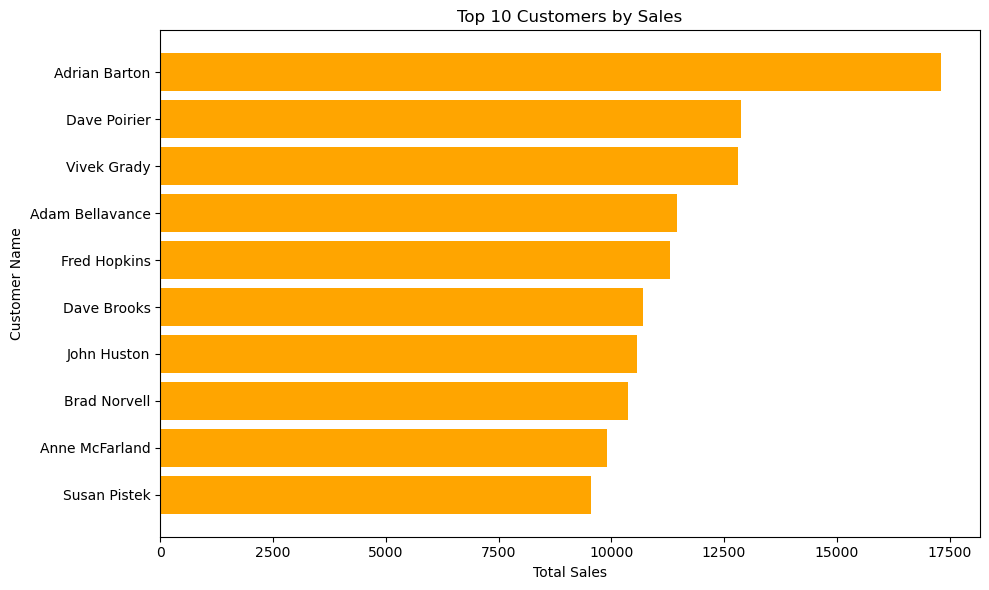

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_customers['Customer Name'],top_customers['Sales'], color='orange') 
ax.set_title('Top 10 Customers by Sales')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Customer Name')
plt.gca().invert_yaxis()
plt.tight_layout()

This shows the top 10 customers by total sales.
Adrian Barton is the top customer with total sales around £17,500. He is the most significant customer by a substantial amount.
David Poirier and Vivek Grady are the next two highest customers for their total sales, both with sales just over £12,500. 
These 3 people and their corresponding organisations significantly outpace the other customers in terms of sales and should be primary targets for customer retention strategies. It might also be beneficial to focus on personlised marketing strategies, loyalty programs, or exclusive offers to try to increase their spending.
This analysis shows where to focus efforts on customer relationship management, in order to continue to drive revenue with these top customers.


### Sales by Customer Segment

In [25]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_sales

,Segment,Sales
0,Consumer,873512.42
1,Corporate,524287.05
2,Home Office,313172.00


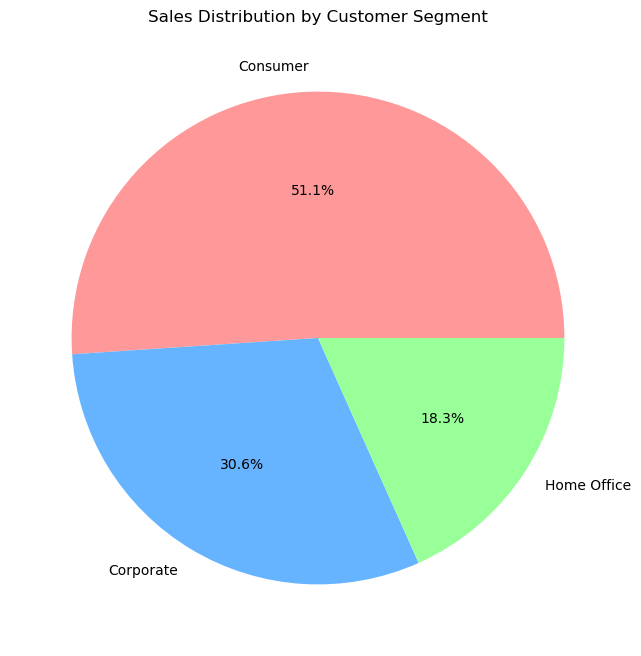

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Sales Distribution by Customer Segment')
plt.show()

This pie chart shows how total sales are distributed across three customer segments: Consumer, Corporate, and Home Office.

Consumer Segment: This segment accounts for the largest portion of total sales, making up 51.1% of the overall revenue. This indicates that the majority of the sales are driven by individual consumers. This segment is clearly the most significant and important contributor to sales. Therefore retail strategies should heavily focus on this group, using strategies such as targeted marketing campaigns, personalized offers, and loyalty programs.

Corporate Segment: The Corporate segment is the second-largest contributor, accounting for 30.6% of total sales. This shows that businesses have a substantial role in generating revenue, though not as much as the consumer segment. This substantial amount of sales indicates potential for growth through corporate partnerships, bulk sales and individual solutions for businesses.

Home Office Segment: The Home Office segment contributes 18.3% to total sales. While this is the smallest segment, it still represents a significant portion of the market, particularly for products that might be more suited to home office setups or small businesses. There is opportunity to grow this segment, with strategies such as discounts for small businesses, or offering specialised products for home office set ups.

### Profitability by Customer Segment

In [27]:
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
segment_profit

,Segment,Profit
0,Consumer,158231.63
1,Corporate,88901.38
2,Home Office,41787.43


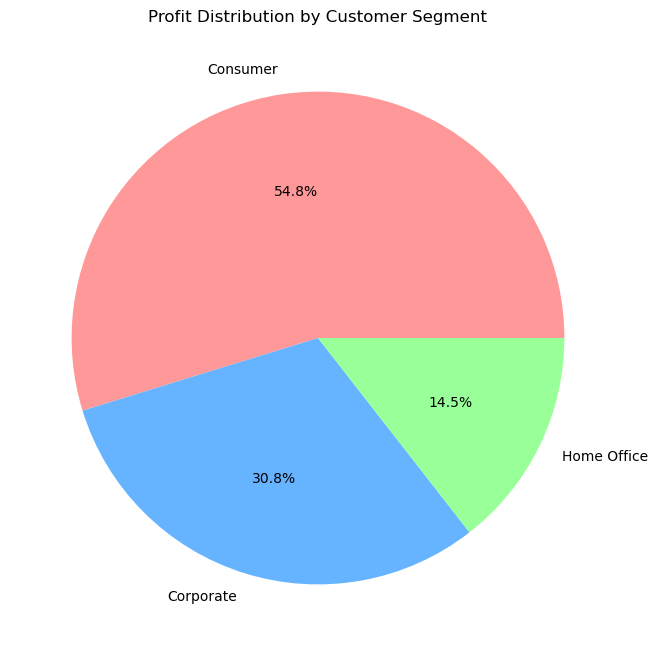

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(segment_profit['Profit'], labels=segment_sales['Segment'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Profit Distribution by Customer Segment')
plt.show()

It is good to check if the high sales means high proft. So now this is looking at what is driving profitability.

As you can see, it follows a very similar pattern to the sales distribution indicating that the Consumer segment is not only the most important contributor to the sales distribution but also for the profitability. The two distributions complement each other indicating a very strong positive correlation. 

### Average Discount per segment

In [29]:
segment_discount = df.groupby('Segment')['Discount'].mean().reset_index()
segment_discount

,Segment,Discount
0,Consumer,0.090079
1,Corporate,0.094740
2,Home Office,0.097067


Text(0, 0.5, 'Average Discount')

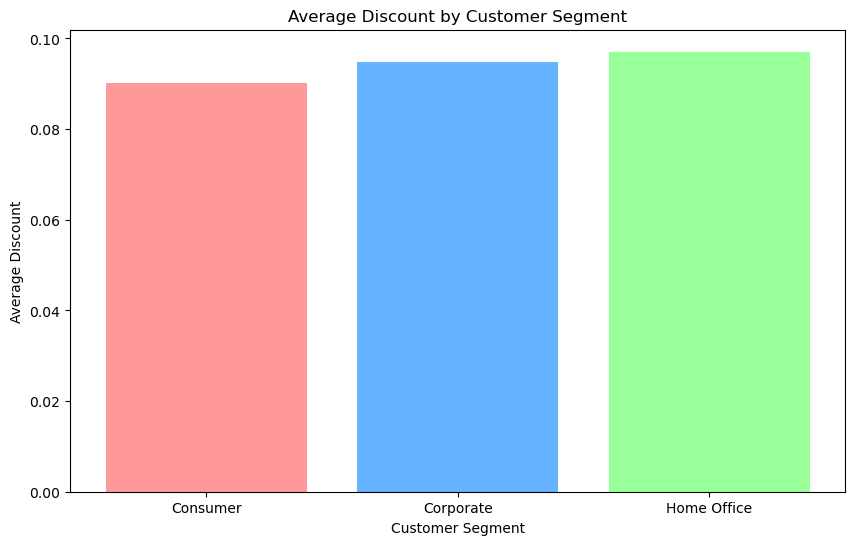

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(segment_discount['Segment'], segment_discount['Discount'], color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Average Discount by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Average Discount')

The bar plot shows the average discount given across the three customer segments:

Corporate: This segment receives the highest average discount, slightly above the Consumer segment.
Consumer: The average discount given to this segment is marginally lower than the Corporate segment.
Home Office: The Home Office segment receives the lowest average discount, though the difference compared to the other segments is minimal.
This analysis indicates that the Corporate and Consumer segments are offered similar average discounts, while the Home Office segment, despite being smaller in terms of sales and profit, also benefits from competitive discounting. This suggests a fairly uniform discount strategy across segments, with slight variations that might be worth exploring further for optimization.

### Customer Lifetime Value (CLV) Estimation

Estimate CLV based on average sales and profit per customer in each segment.

In [31]:
segment_clv = df.groupby('Segment').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()
segment_clv['CLV'] = segment_clv['Sales'] * segment_clv['Profit']
segment_clv

,Segment,Sales,Profit,CLV
0,Consumer,1729.727564,313.329960,541975.469236
1,Corporate,1747.623500,296.337933,517887.136235
2,Home Office,1606.010256,214.294513,344159.185482


Text(0, 0.5, 'Customer Segment')

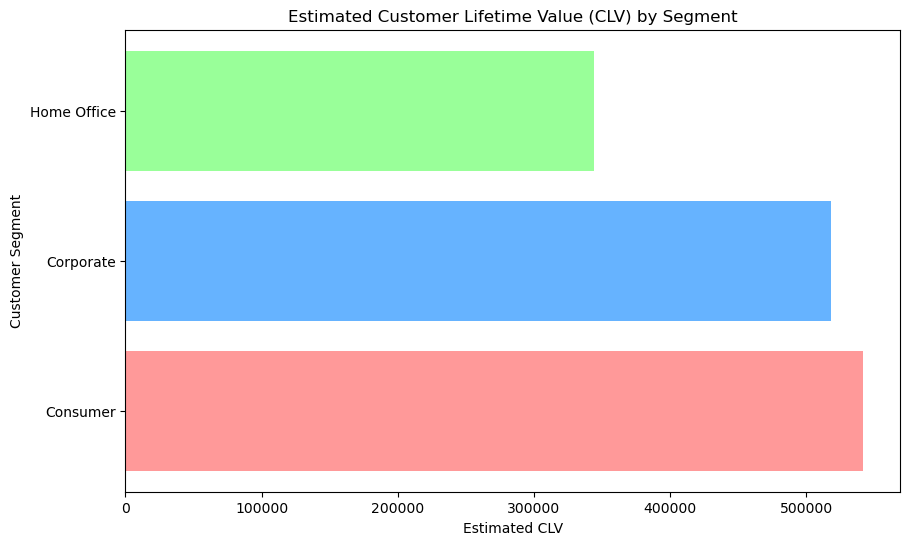

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(segment_clv['Segment'], segment_clv['CLV'], color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Estimated Customer Lifetime Value (CLV) by Segment')
ax.set_xlabel('Estimated CLV')
ax.set_ylabel('Customer Segment')

The bar plot illustrates the estimated Customer Lifetime Value (CLV) for each customer segment:

Consumer: This segment has the highest estimated CLV, indicating that customers in this group are likely to generate the most revenue over their lifetime.

Corporate: The Corporate segment follows closely. Indicating nearly as much value.
Home Office: The lowest estimated CLV, suggesting their long-term value is less than the other segments.
This analysis suggests that the Consumer and Corporate segments are particularly valuable in the long term. Efforts to nurture these relationships could lead to sustained revenue growth. For the Home Office segment, strategies might focus on increasing customer loyalty and repeat purchases to enhance their lifetime value.


# Section 4

## Time Series Analysis

Looking at how sales and profit fluctuates over time, looking whether there are any seasonal patterns, and also looking to identify key periods that drive the business.

### Monthly Sales Trend

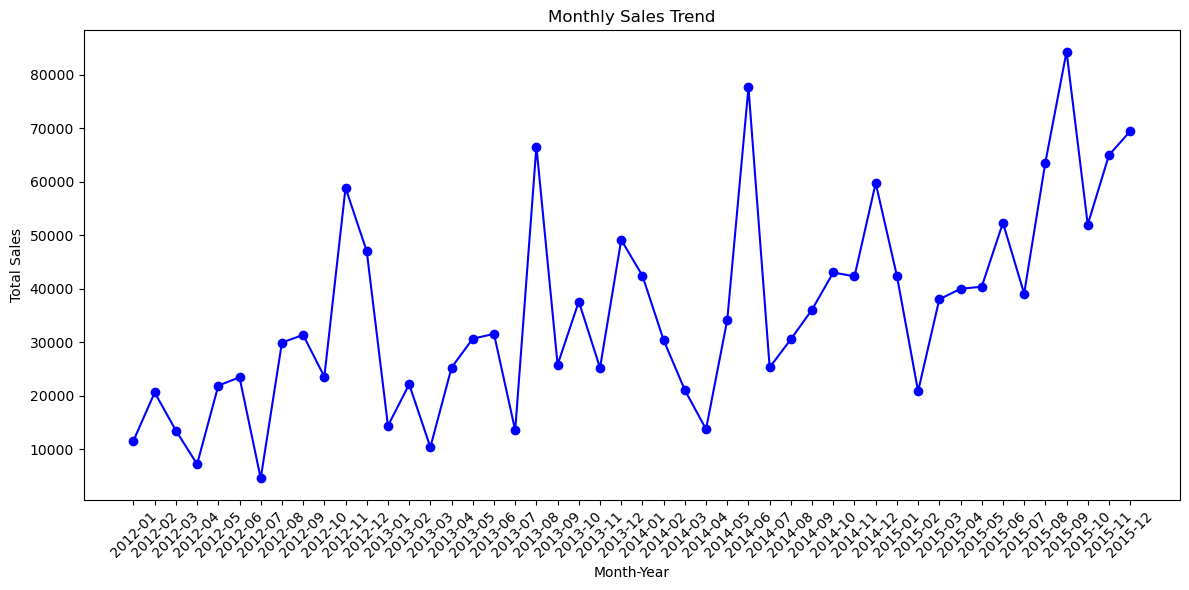

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sales['Month-Year'].astype('str'), monthly_sales['Sales'], marker='o', color='b')
ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

The line plot illustrates the trend in monthly sales over time.

Overall Growth: There is a clear upward trend in sales over the months, indicating that the business has been growing steadily.

Seasonal Fluctuations: The plot shows significant fluctuations in sales from month to month, with certain periods experiencing sharp increases followed by declines. These fluctuations suggest potential seasonality in sales, where certain times of the year there are consistently higher sales.

Notable Peaks: There are several distinct peaks throughout the observed period. These could indicated successful sales campaigns, holiday seasons, or some other factor causign these peak sales.

Insights:

The general upward trend is a positive indicator of business growth, but the fluctuations also suggest that there may be specific times of the year when sales efforts should be intensified.
Identifying the reasons behind the peaks can help replicate these successes in future periods.



### Monthly Profit Trend

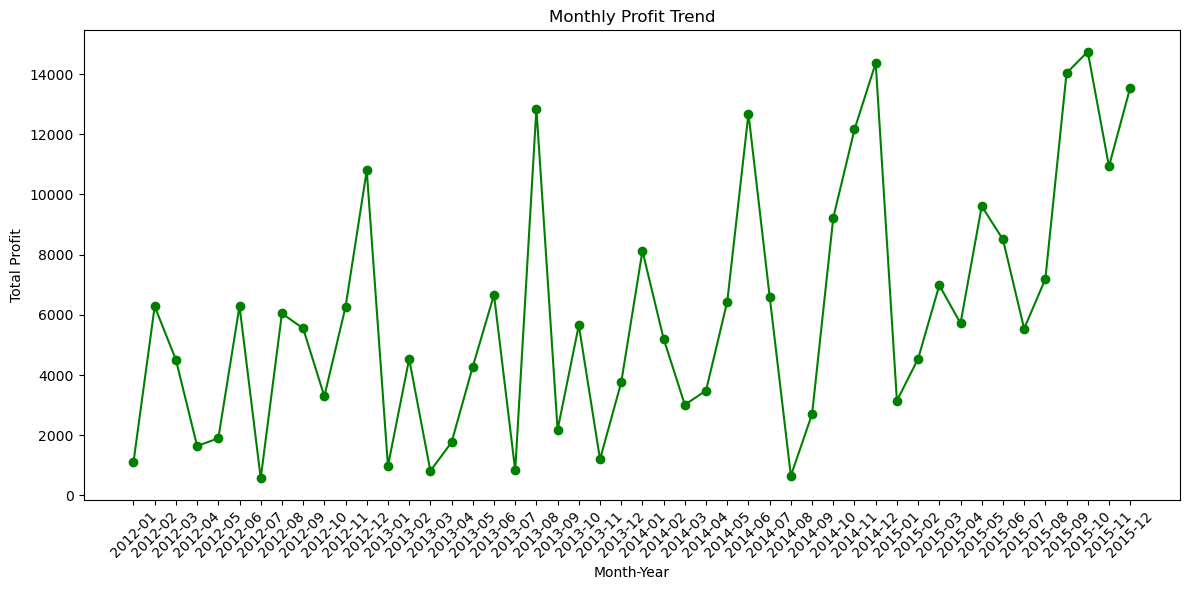

In [34]:
monthly_profit = df.groupby('Month-Year')['Profit'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_profit['Month-Year'].astype('str'), monthly_profit['Profit'], marker='o', color='g')
ax.set_title('Monthly Profit Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()


The profit trend seems to be on a gradual upward path. Meaning that over time, the business is becoming more profitable.

Fluctuations: The profit fluctuates month to month. Some months show significant spikes, while others dip quite low. This tells us that while sales might be increasing, profits can still vary greatly. There might be months where costs, discounts, or other factors reduce the profit significantly.

Big Spikes: There are several large spikes in profit along this timeline. It is worth investigating what happened during those months to provide valuable insights for the future.

Dips and Drops: There are several months of very low profit level recorded. These could be caused from higher cost, big discounts or something else. Again this needs further investigation to know what is having an effect so we can learn and make better decisions in the future to hopefully avoid these low profitability months.

### Seasonal Sales Analysis

In [35]:
df['Month'] = df['Order Date'].dt.month
seasonal_sales = df.groupby('Month')['Sales'].sum().reset_index()
seasonal_sales

,Month,Sales
0,1,110939.14
1,2,94091.23
2,3,83064.62
3,4,86287.99
4,5,127209.72
5,6,185103.16
6,7,82563.72
7,8,190780.27
8,9,177697.76
9,10,156310.63


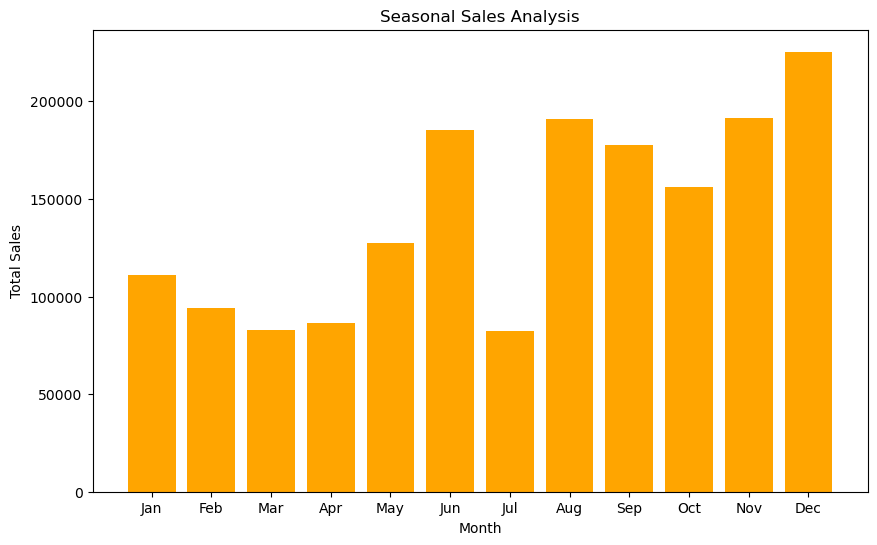

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(seasonal_sales['Month'], seasonal_sales['Sales'], color='orange')
ax.set_title('Seasonal Sales Analysis')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
# Set the x-ticks to display the month names
plt.xticks(seasonal_sales['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

This tells us how sales fluctuate throughout the year and they offer some insight.

Early Year Slump: Sales are significantly worse in the first 4 months of the year. This could be a post-holiday dip after the christmas period, where customers are less inclined to spend money.This is a very common trend in many industries. Highlighting the opportunity for growth and a chance to boost sales in these slower months.

Steady Growth: As we move into May, sales begin to pick up significantly, potentially due to new products being released or new marketing campaigns. They continue to rise significantly in June, then stay steady from June to November with the exception of July. July has very low sales and would need to be investigated what causes this noticeable decrease.

Peak Season: December shows the highest sales with a strong increase in sales from October to December. This aligns with holiday shopping. Sales could possibly be driven by Black Friday, Cyber Monday and buying presents.

Strategic Focus: Given this pattern, focusing on the second half of the year is important to maximise revenue. Businesses might focus their efforts on ramping up inventory, marketing, and promotions leading into these months to capitalize on the increased consumer spending.

### Seasonal Profit Analysis

In [37]:
seasonal_profit = df.groupby('Month')['Profit'].sum().reset_index()
seasonal_profit

,Month,Profit
0,1,13358.28
1,2,20560.61
2,3,15319.30
3,4,12615.23
4,5,22228.81
5,6,34148.08
6,7,13547.15
7,8,26737.31
8,9,24468.93
9,10,32917.86


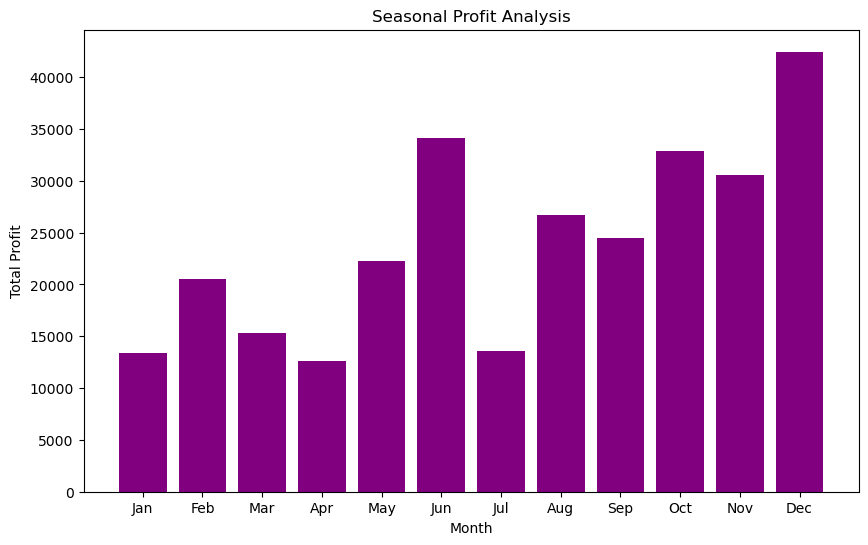

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(seasonal_profit['Month'], seasonal_profit['Profit'], color='purple')
ax.set_title('Seasonal Profit Analysis')
ax.set_xlabel('Month')
ax.set_ylabel('Total Profit')
plt.xticks(seasonal_profit['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Looking at the profit, it goes quite hand in hand with Sales graph.

Year-End Surge: As we approach the end of the year, profit picks up considerably, especially in October, November, and December. December tops the chart, indicating not just high sales but also strong profitability. This is likely due to the holiday season, where consumers are willing to spend more on premium products, and businesses may optimize pricing to maximize profit.

Strategic Implications: Given that December has the highest profit, it’s clear that the year-end season is crucial for the business’s financial health. Focusing on high-margin products and effective pricing strategies during this period can further enhance profitability.

### Sales and Profit Over Time (Yearly)

In [63]:
df['Year'] = df['Order Date'].dt.year

In [64]:
yearly_performance = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
yearly_performance

,Year,Sales,Profit
0,2012,293829.82,54249.43
1,2013,352570.33,45515.51
2,2014,456844.29,84663.14
3,2015,607727.03,104492.36


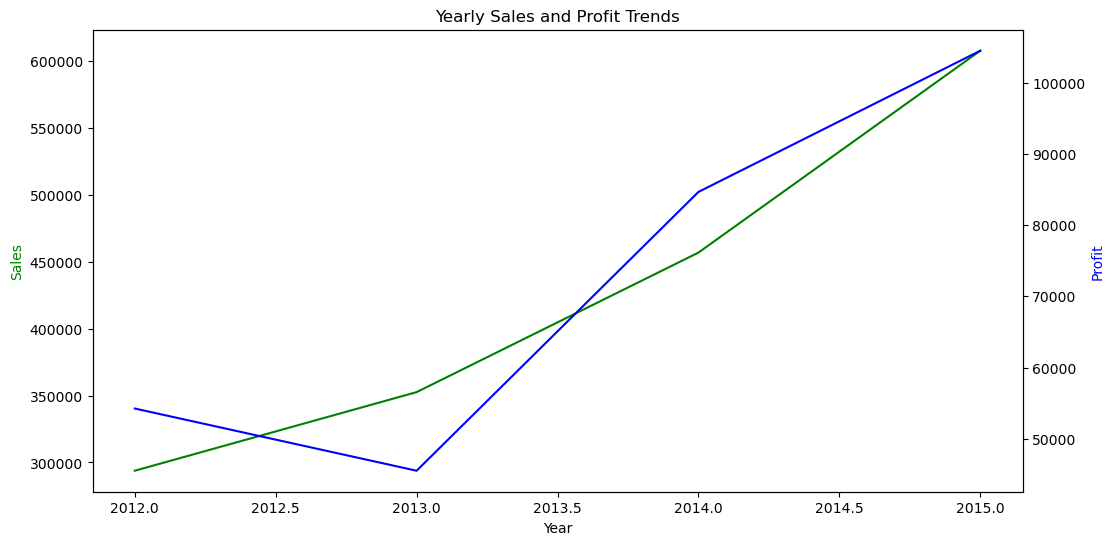

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
# Write your code here for Yearly Sales trends
ax1.plot(yearly_performance['Year'], yearly_performance['Sales'],color= 'g')
# Write your code here for Yearly Profit trends
ax2.plot(yearly_performance['Year'], yearly_performance['Profit'], color='b')

ax1.set_title('Yearly Sales and Profit Trends')
ax1.set_ylabel('Sales', color='g')
ax2.set_ylabel('Profit', color='b')
ax1.set_xlabel('Year')
plt.show()

This dual-axis plot provides an insightful overview of the yearly trends in sales (green line) and profit (blue line). Here’s what stands out:

Steady Growth in Sales: The green line representing sales shows a consistent upward trajectory from 2012 to 2015. Showing a positive sign of growth through increased revenue year on year.

Profit Recovery and Growth: The blue line representing profit starts with a slight dip from 2012 to 2013, but from 2013 onwards, there’s a strong recovery and consistent growth. By 2014, profit has caught up with sales, showing that the business has managed to improve its profitability alongside its revenue growth.

Parallel Trends: Notice how both lines generally move upward in parallel after 2013. This parallel movement suggests that the business has been able to manage its costs effectively while scaling up its sales, leading to a proportional increase in profit. This is an ideal scenario where both sales and profit grow together.

# Section 5

## Product and Inventory Analysis

In this section, looking at which products are the best and how inventory decisions impact overall performance.

### Top 10 selling products

In [68]:
top_products = df.groupby('Product Name')['Sales'].sum().reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)
top_products

,Product Name,Sales
355,"Motorola Smart Phone, Full Size",48542.52
21,"Apple Smart Phone, Full Size",42303.44
143,"Cisco Smart Phone, Full Size",41325.20
368,"Nokia Smart Phone, Full Size",27661.97
438,"Samsung Smart Phone, Cordless",25438.59
282,"Hoover Stove, Red",23477.81
356,"Motorola Smart Phone, with Caller ID",23239.44
238,"Harbour Creations Executive Leather Armchair, ...",22145.80
144,"Cisco Smart Phone, with Caller ID",22047.89
142,"Cisco Smart Phone, Cordless",21954.87


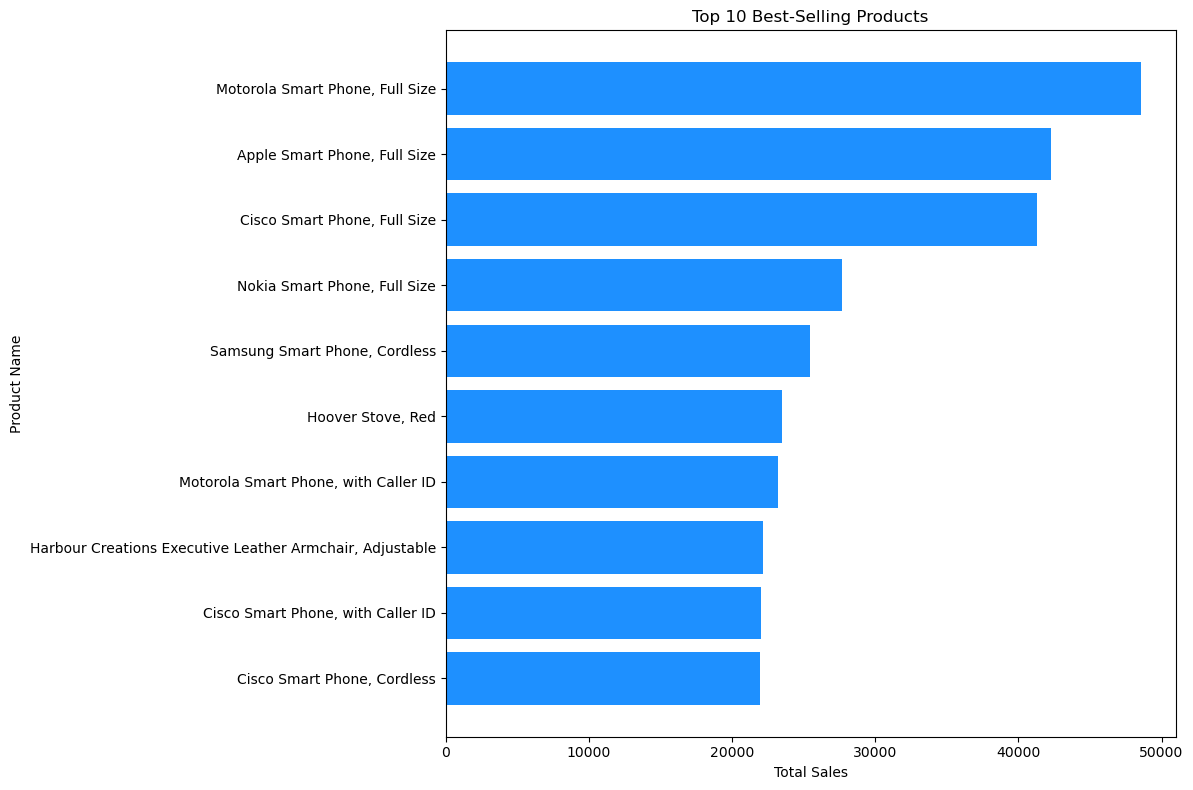

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(top_products['Product Name'], top_products['Sales'], color='dodgerblue')
ax.set_title('Top 10 Best-Selling Products')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Product Name')
plt.gca().invert_yaxis() 
plt.tight_layout()

From this plot you can see 3 clear best sellers with sales over £40,000 for each product. The top performing product is the Motorola Smart Phone, Full Size, which has total sales of nearly £50,000.

8 of the 10 top products are smart phones. Indicating high demand in smart phones over this period of time and an opportunity to maximise sales in this area. Another reason for these products having high sales revenue is that they are expensive products are people are willing to pay premium prices for them.

It would be worth making sure you have plenty of Smart Phones in inventory so that you are able to maximise this trend as much as possible.

### Inventory impact on Profit

In [70]:
inventory_impact = df.groupby('Product Name').agg({'Quantity': 'sum', 'Profit': 'sum'}).reset_index()
inventory_impact

,Product Name,Quantity,Profit
0,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",3,12.32
1,1/4 Fold Party Design Invitations & White Enve...,1,1.98
2,36X48 HARDFLOOR CHAIRMAT,2,-5.45
3,"3M Polarizing Task Lamp with Clamp Arm, Light ...",6,213.69
4,"ACCOHIDE 3-Ring Binder, Blue, 1""",3,3.35
...,...,...,...
524,Xerox 1998,7,12.70
525,Xerox 214,13,27.47
526,Xerox 231,4,7.26
527,Zebra Zazzle Fluorescent Highlighters,3,2.55


Text(0, 0.5, 'Total Profit')

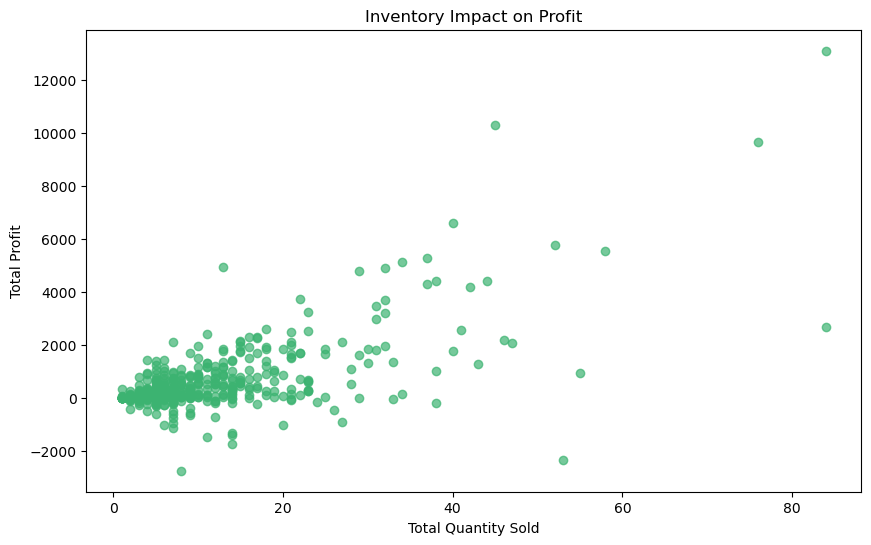

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(inventory_impact['Quantity'], inventory_impact['Profit'], color='mediumseagreen', alpha=0.7)
ax.set_title('Inventory Impact on Profit')
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Total Profit')

This scatterplot shows:

Cluster Around Low Quantities: Most of the products are clustered around the lower end of the quantity scale, with total quantities sold generally below 20. This cluster shows a mix of profits, with many products hovering around the break-even point (near zero profit). There are also some products within this range that generate significant profits, as well as some that result in losses.

Outliers with High Quantities: There are a few outliers where products have sold in much higher quantities (above 40), with a correlation with high profits. This coincides with top sellers being smart phones as they would have significant profits as they are a premium product that doesn't rely on discounts. 

Top Performer: There’s a standout product that,has the largest quantities sold, around 80 and has generated a very high profit (over 12,000). This is an example of a product with a high-profit margin, likely due to its pricing strategy or low cost.

### Product Category Performance

In [72]:
category_performance = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
category_performance

,Category,Sales,Profit
0,Furniture,601492.31,82188.95
1,Office Supplies,352496.14,61662.81
2,Technology,756983.02,145068.68


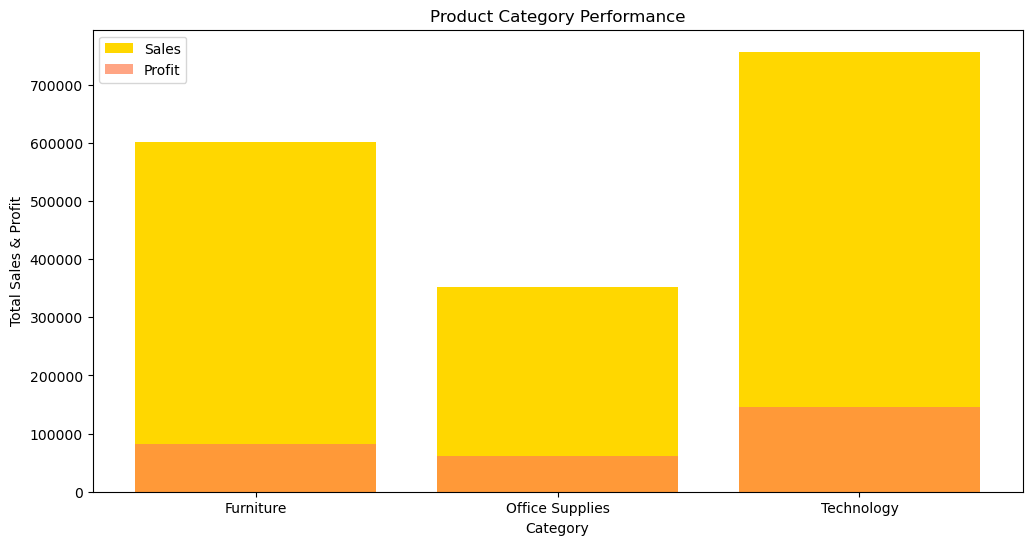

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(category_performance['Category'], category_performance['Sales'], color='gold', label='Sales')
ax.bar(category_performance['Category'], category_performance['Profit'], color='coral', label='Profit', alpha=0.7)
ax.set_title('Product Category Performance')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales & Profit')
ax.legend()

Technology: The Technology category not only has the highest total sales but also the highest profit. This indicates that Technology products are both popular and profitable, making them a crucial focus for the business.

Office Supplies: Office Supplies shows the wort performance in sales and profit. This could indicate that Office Supplies either has higher costs, lower margins, or is often sold with higher discounts. Making it a challenge for the business for both sales and profitability.

Furniture: Shows a strong performance in sales but with a significantly reduced profit in comparison to Techonology. Indicating items in this category are probably sold with higher discounts or has higher costs that affect the overall profitability.

The Technology category is clearly a powerhouse, driving both sales and profit. It’s a category worth investing in, whether through marketing, expanding the product range, or optimizing inventory. Furniture, while also strong in sales, might benefit from a closer look at cost management or pricing strategies to boost profitability. Office Supplies, though generating good sales, poses a challenge in terms of profit—perhaps it’s time to review the pricing, cost structure, or promotional strategies for this category.

### Analysing Discount Effects by Product

In [48]:
discount_effect = df.groupby('Product Name').agg({'Discount': 'mean', 'Profit': 'sum'}).reset_index()
discount_effect

,Product Name,Discount,Profit
0,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",0.0,12.32
1,1/4 Fold Party Design Invitations & White Enve...,0.2,1.98
2,36X48 HARDFLOOR CHAIRMAT,0.2,-5.45
3,"3M Polarizing Task Lamp with Clamp Arm, Light ...",0.0,213.69
4,"ACCOHIDE 3-Ring Binder, Blue, 1""",0.2,3.35
...,...,...,...
524,Xerox 1998,0.2,12.70
525,Xerox 214,0.1,27.47
526,Xerox 231,0.2,7.26
527,Zebra Zazzle Fluorescent Highlighters,0.2,2.55


Text(0, 0.5, 'Total Profit')

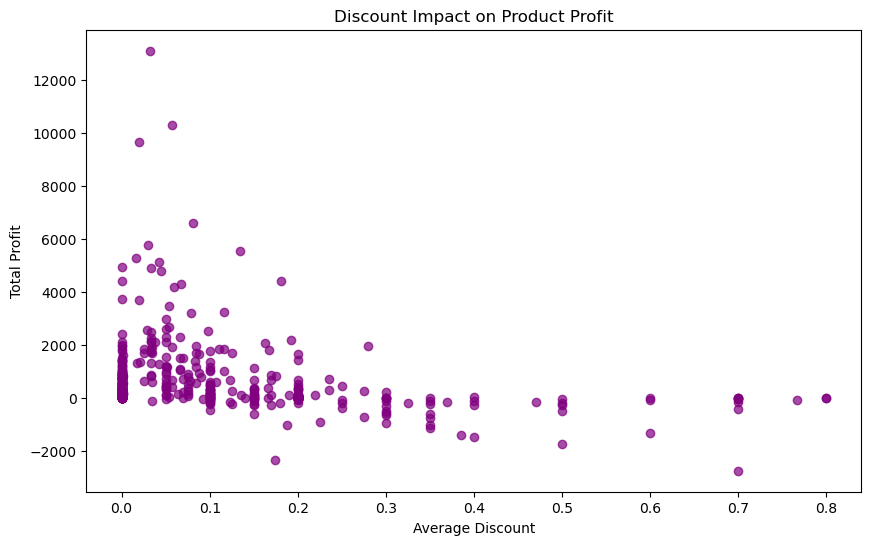

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(discount_effect['Discount'], discount_effect['Profit'], color='purple', alpha=0.7)
ax.set_title('Discount Impact on Product Profit')
ax.set_xlabel('Average Discount')
ax.set_ylabel('Total Profit')

Low to Moderate Discounts (0% to ~10%): The majority of products are clustered in this range, showing a mix of profits. Some products maintain a positive profit even with moderate discounts, suggesting that these items might have strong margins or high demand, allowing them to stay profitable even when discounted.

High Discounts (Above 10%): As we move towards higher discount levels, the spread of profits narrows, and we start seeing more products dipping into negative profit territory. This indicates that while discounts might help move products, they can also significantly erode profit margins, especially when discounts exceed 20-30%.

Outliers: Notice the few outliers where products with moderate discounts still generate very high profits (above 2,000). These outliers are likely premium or high-margin products that can sustain discounts without sacrificing profitability.

This scatter plot highlights the delicate balance between offering discounts and maintaining profitability. While discounts can be a useful tool to boost sales, especially for lower-margin products, they need to be managed carefully. For many products, higher discounts seem to result in lower or even negative profits, suggesting a need for strategic discounting—targeting discounts where they’ll do the most good without eroding overall profitability.

# Section 6

## Discount and Pricing Analysis

This section will show the impact of discounts and pricing on sales and profit.

### Analysing discount levels across product categories

In [52]:
category_discounts = df.groupby('Category')['Discount'].mean().reset_index()
category_discounts

,Category,Discount
0,Furniture,0.105031
1,Office Supplies,0.115520
2,Technology,0.066759


Text(0, 0.5, 'Average Discount')

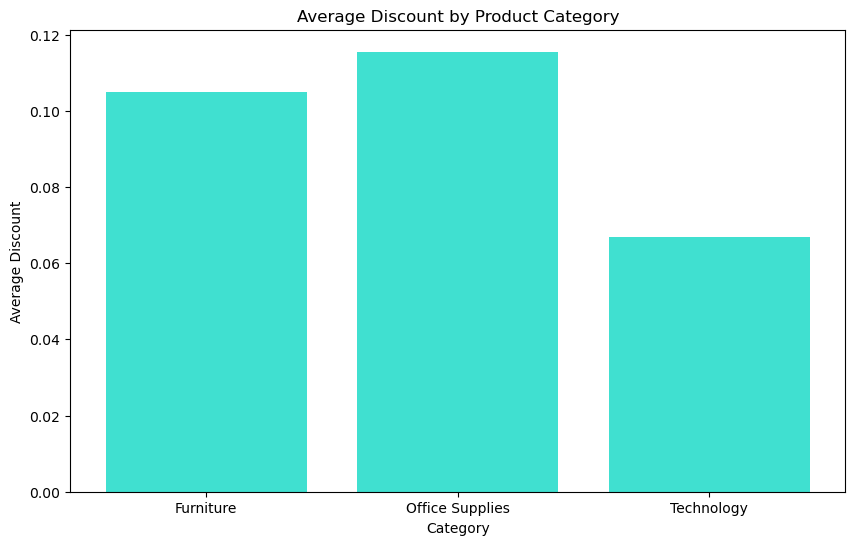

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(category_discounts['Category'], category_discounts['Discount'], color='turquoise')
ax.set_title('Average Discount by Product Category')
ax.set_xlabel('Category')
ax.set_ylabel('Average Discount')



Office Supplies in Discounts : The Office Supplies category receives the highest average discount, around 11%. This suggests that discounting is a common strategy for this category, perhaps to boost sales in a competitive market or to clear out inventory. This also coincides with this category having the lowest total sales and profitability.

Furniture in the Middle: Furniture also see substantial discounts, though slightly less than Office Supplies. This category likely benefits from moderate discounting to drive volume sales, which could be part of a broader strategy to maintain steady sales in this category.

Technology with the Least Discount: The Technology category receives the lowest average discount, around 6%. This might indicate that Technology products have higher demand or better margins, allowing them to be sold with less discounting. Customers may be willing to pay closer to full price for these items due to their perceived value or necessity.

### Impact of Discounts on Sales Performance

In [75]:
discount_sales = df.groupby('Discount')['Sales'].sum().reset_index()
discount_sales

,Discount,Sales
0,0.000,1034792.71
1,0.002,19571.01
2,0.070,28109.13
3,0.100,285351.47
4,0.150,61880.16
5,0.170,61344.97
6,0.200,75759.09
7,0.250,9268.76
8,0.270,8590.59
9,0.300,30529.82


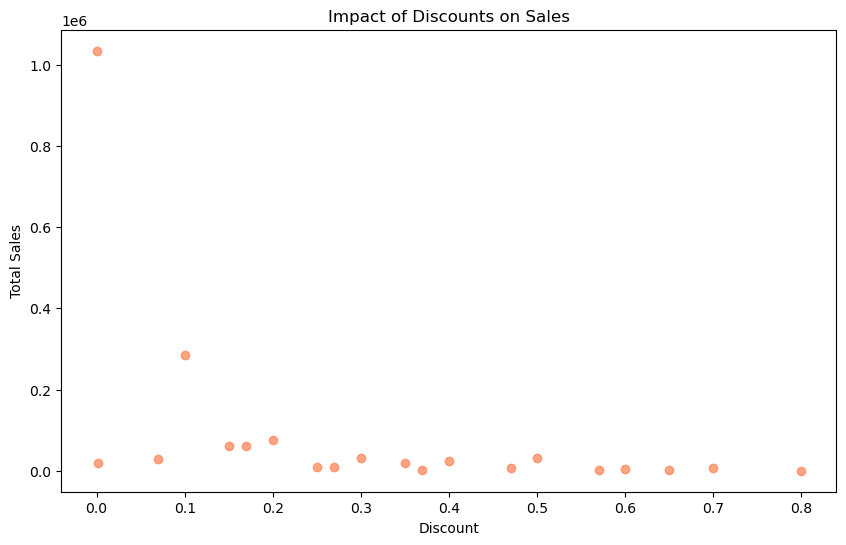

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(discount_sales['Discount'], discount_sales['Sales'], color='coral', alpha=0.7)
ax.set_title('Impact of Discounts on Sales')
ax.set_xlabel('Discount')
ax.set_ylabel('Total Sales')
plt.show()

This scatter plot reveals the relationship between different discount levels and the corresponding total sales.

Low to Moderate Discounts (0% to 10%): The majority of sales volume occurs within this discount range, with a significant peak in sales when discounts are around 10%. This suggests that offering small to moderate discounts can effectively drive sales, making this range potentially optimal for maximizing revenue without giving away too much margin.

Sharp Drop Beyond 10%: As the discount level increases beyond 10%, there’s a noticeable drop in total sales. This could indicate that higher discounts aren’t necessarily boosting sales in the same way. It’s possible that such discounts might be applied to products that don’t sell as well, or the market doesn’t respond as strongly to deep discounts.

Minimal Impact at Higher Discounts: Discounts above 50% appear to have a minimal impact on total sales, with very few sales occurring at these levels. This suggests that deep discounts might not be as effective in driving volume, and could potentially hurt profitability without generating sufficient additional sales.

The plot suggests that there’s a sweet spot for discounting, particularly around the 10% point, where sales are maximized. Higher discounts seem to yield diminishing returns, meaning they might not be worth the reduction in profit margins. This insight is crucial for setting discount strategies that drive sales effectively without unnecessarily cutting into profits.

### Analyzing Profit Margins at Different Discount Levels

In [76]:
discount_profit_margin = df.groupby('Discount')['Profit'].sum().reset_index()
discount_profit_margin

,Discount,Profit
0,0.000,261142.04
1,0.002,4342.97
2,0.070,3401.88
3,0.100,49541.65
4,0.150,6899.65
5,0.170,6212.59
6,0.200,7834.50
7,0.250,-604.72
8,0.270,498.39
9,0.300,-4773.72


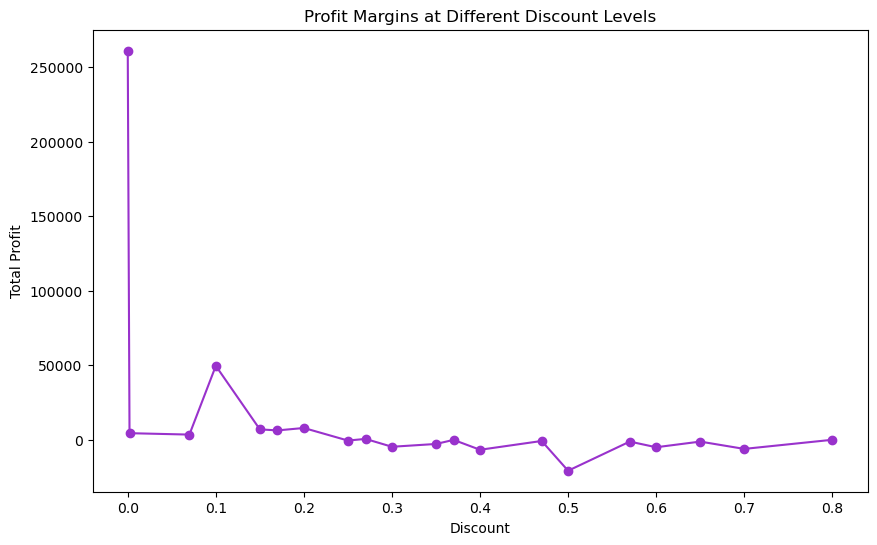

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(discount_profit_margin['Discount'], discount_profit_margin['Profit'], marker='o', color='darkorchid')
ax.set_title('Profit Margins at Different Discount Levels')
ax.set_xlabel('Discount')
ax.set_ylabel('Total Profit')
plt.show()

The line plot offers a clear picture of how profit margins are affected by varying discount levels.

Profit Peaks at No Discount: It’s no surprise that when there’s no discount applied (0% discount), the profit is at its highest.

Steep Decline with Small Discounts: As soon as discounts are introduced, even at a modest level (around 10%), there’s a sharp drop in total profit. This suggests that even small discounts can significantly impact the bottom line, likely because they reduce the margin without sufficiently increasing sales volume to compensate.

Consistent Losses at Higher Discounts: As the discount increases beyond 20%, the profits dip into negative territory and remain there. This trend highlights the danger of deep discounts—they seem to consistently result in losses, possibly because the increased sales volume isn’t enough to offset the heavy price cuts.

The analysis reveals that while discounts can stimulate sales, there’s a fine line between boosting revenue and eroding profits. The data suggests that the optimal discount strategy likely falls in the low to moderate range, where the business can drive additional sales without sacrificing too much profitability. Beyond this range, discounts appear to do more harm than good, leading to losses that could be avoided with a more cautious approach.

### Pricing Strategy Evaluation

In [58]:
pricing_strategy = df[['Product Name', 'Sales', 'Discount']].copy()
pricing_strategy['Discounted Price'] = pricing_strategy['Sales'] * (1 - pricing_strategy['Discount'])

In [89]:
key_products = pricing_strategy.groupby('Product Name').mean().sort_values(by='Sales', ascending=False).head(10)

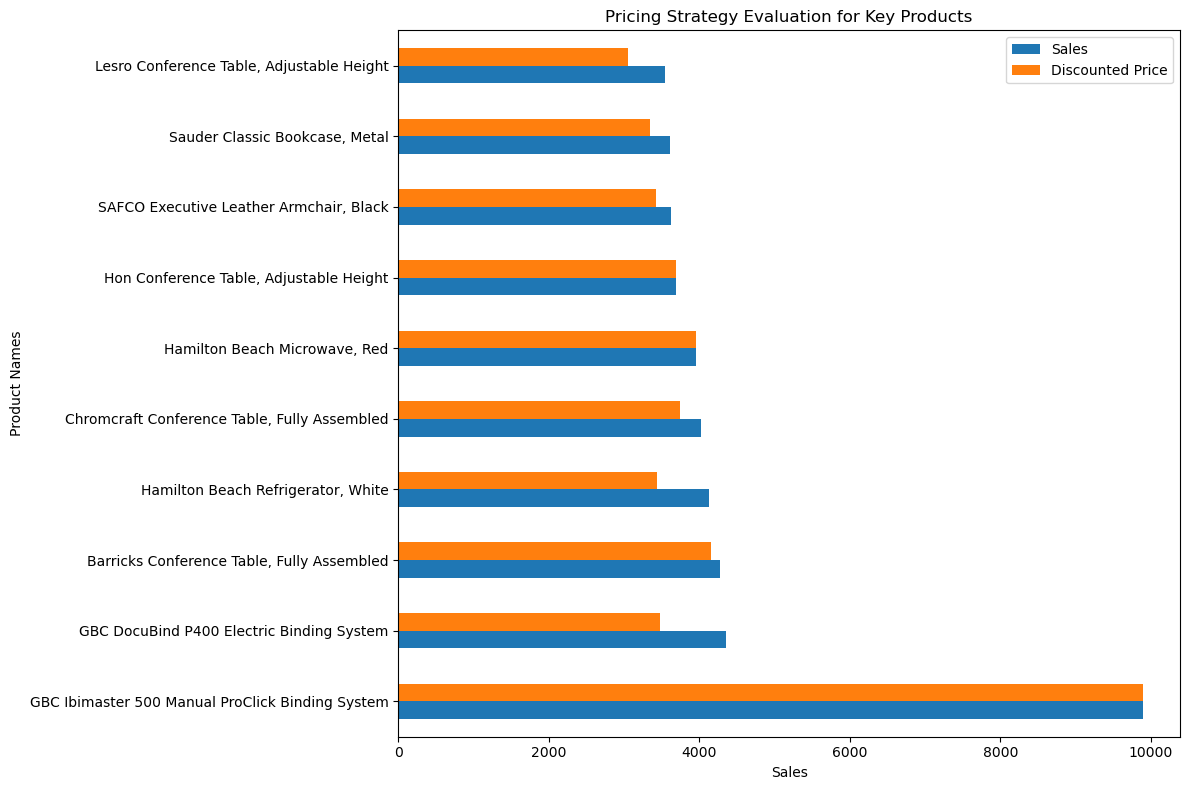

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))
key_products[['Sales', 'Discounted Price']].plot(kind='barh', ax=ax)
ax.set_title('Pricing Strategy Evaluation for Key Products')
ax.set_xlabel('Sales')
ax.set_ylabel('Product Names')
plt.tight_layout()

The bar plot provides a side-by-side comparison of the original sales values and the discounted prices for key products.

Key Takeaway:

This analysis highlights the effectiveness of strategic discounting for different products. While discounts help boost sales, especially for high-value items, it’s important to monitor the gap between original and discounted prices. Products that maintain strong sales even with discounts are ideal candidates for promotions, as they can drive volume without severely impacting profit margins. However, for products with a larger gap between original and discounted prices, it might be worth exploring if the discount is too steep or if alternative pricing strategies could yield better results.

### Finding the Optimal Discount Level

In [91]:
optimal_discount = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
optimal_discount['Profit Margin'] = optimal_discount['Profit'] / optimal_discount['Sales']

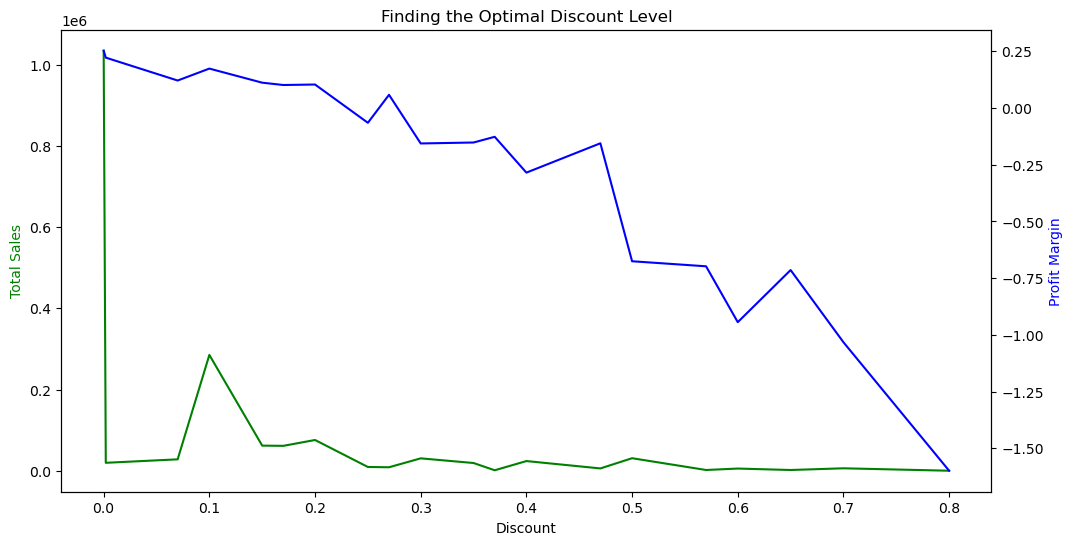

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(optimal_discount['Discount'], optimal_discount['Sales'], 'g-')
ax2.plot(optimal_discount['Discount'], optimal_discount['Profit Margin'], 'b-')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Total Sales', color='g')
ax2.set_ylabel('Profit Margin', color='b')
ax1.set_title('Finding the Optimal Discount Level')
plt.show()

This dual-axis plot illustrates the relationship between discount levels, total sales, and profit margins.

Sales and Profit Dynamics: Initially, at 0% discount, total sales are at their peak while profit margins are at their highest—this is the ideal scenario but not always realistic in a competitive market.

Sweet Spot Around 10-20% Discount: At around a 10-20% discount, total sales stay strong, and while the profit margin hovers around 0. This indicates that discounts in this range can still push high sales without heavily impacting profits.

Steep Decline Beyond 20%: As the discount increases beyond 20%, both total sales and profit margins begin to decline. The sales volume decreases, and the profit margins dip further into negative territory, indicating that the higher discounts are not translating into sufficient sales to compensate for the loss in profit.

Bottoming Out at High Discounts: At the highest discount levels (above 50%), both sales and profit margins are at their lowest. This indicates that deep discounts are likely unsustainable, leading to minimal sales and substantial negative profit margins.

Key Takeaway:

This analysis highlights that the optimal discount level likely falls within the 10-20% range, where you can still drive significant sales while maintaining a relatively stable profit margin. Beyond this range, the effectiveness of discounts diminishes, leading to lower sales and increasingly negative profit margins. For sustainable growth, it’s essential to strike a balance—offering enough of a discount to boost sales without cutting too deeply into profits.

# Section 7 

# Conclusion

Section 1: 
Exploratory Data Analysis to understand the data set before more formal analysis.

Section 2:
Sales and Profit Analysis: Explored how sales and profit are connected, uncovering those high-revenue items that may not always bring in the big bucks on the profit side.The scatter plots showed us that high sales don’t always mean high profits—sometimes, it’s about finding those hidden gems in your product lineup that deliver both.

Section 3:
Customer and Segment Analysis: Understanding who’s driving those sales and profits. We looked at customer segments and found that different groups contribute differently—whether it’s the big-spending consumers or the reliable corporate clients. Knowing where your revenue comes from helps you tailor your marketing and sales efforts for maximum impact.

Section 4:
Time-Series Analysis: Analyzing trends month by month, year by year. This section showed us the importance of timing—recognizing when sales peak, spotting seasonal trends, and understanding the ebb and flow of business. It’s all about being prepared for those high-demand periods and making sure you’re stocked and ready to go.

Section 5:
Product and Inventory Analysis: Looking at what’s selling and what’s sitting on the shelf. By understanding your top products, we figured out how to manage inventory more effectively, making sure you’re investing in the right products and keeping your warehouse lean and profitable.

Section 6: 
Discount and Pricing Analysis: Looked at the balance of pricing and discounting. We discovered that while discounts can boost sales, they can also quickly eat into profits if not managed carefully. We found that sweet spot where discounts drive the most value without giving away the farm.

Final Thoughts
Wrapping up this project, looking at the bigger picture how all these sections merge together. Running a successful retail operation isn’t just about selling more—it’s about selling smarter. It’s about knowing your customers, timing your promotions, managing your inventory, and pricing your products just right.